In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
import numpy as np  #For linear algebra
import pandas as pd   #data processing, CSV file

In [3]:
train = pd.read_csv("../input/digit-recognizer/train.csv")
test = pd.read_csv("../input/digit-recognizer/test.csv")

In [4]:
print(train.shape) #Gives dimension of array
ntrain = train.shape[0]

print(test.shape)
ntest = test.shape[0]

train.head(10)

(42000, 785)
(28000, 784)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
print(train.dtypes[:5]) # all int64, otherwise do train = train.astype('int64')
print(train.dtypes[:5]) # all int64, otherwise do test = test.astype('int64')

label     int64
pixel0    int64
pixel1    int64
pixel2    int64
pixel3    int64
dtype: object
label     int64
pixel0    int64
pixel1    int64
pixel2    int64
pixel3    int64
dtype: object


In [6]:
ytrain = train["label"]
print("Shape of ytrain: ", ytrain.shape)

# dataframe containing all pixels (the label column is dropped)
xtrain = train.drop("label", axis=1)

# the images are in square form, so dim*dim = 784
from math import sqrt
dim = int(sqrt(xtrain.shape[1]))
print("The images are {}x{} squares.".format(dim, dim))

print("Shape of xtrain: ", xtrain.shape)


Shape of ytrain:  (42000,)
The images are 28x28 squares.
Shape of xtrain:  (42000, 784)


In [7]:
ytrain.head(5)

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

(42000,)
<class 'pandas.core.series.Series'>
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64
The mean amount of elements per class is 4200.0
The standard deviation in the element per class distribution is 237.08929400825616


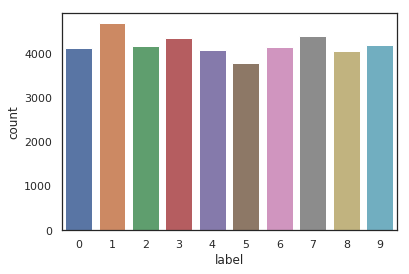

In [8]:
import seaborn as sns
sns.set(style='white', context='notebook', palette='deep')

# plot how many images there are in each class
sns.countplot(ytrain)

print(ytrain.shape)
print(type(ytrain))

# array with each class and its number of images
vals_class = ytrain.value_counts()
print(vals_class)

# mean and std
cls_mean = np.mean(vals_class)
cls_std = np.std(vals_class,ddof=1)

print("The mean amount of elements per class is", cls_mean)
print("The standard deviation in the element per class distribution is", cls_std)

# 68% - 95% - 99% rule, the 68% of the data should be cls_std away from the mean and so on
# https://en.wikipedia.org/wiki/68%E2%80%9395%E2%80%9399.7_rule
if cls_std > cls_mean * (0.6827 / 2):
    print("The standard deviation is high")
    
# if the data is skewed then we won't be able to use accurace as its results will be misleading and we may use F-beta score instead.


In [9]:
def check_nan(df):
    print(df.isnull().any().describe())
    print("There are missing values" if df.isnull().any().any() else "There are no missing values")

    if df.isnull().any().any():
        print(df.isnull().sum(axis=0))
        
    print()
        
check_nan(xtrain)
check_nan(test)


count       784
unique        1
top       False
freq        784
dtype: object
There are no missing values

count       784
unique        1
top       False
freq        784
dtype: object
There are no missing values



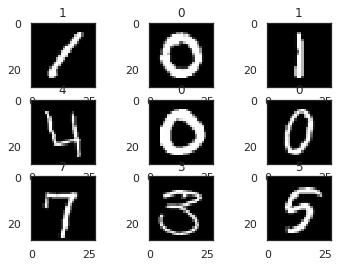

In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

# convert train dataset to (num_images, img_rows, img_cols) format in order to plot it
xtrain_vis = xtrain.values.reshape(ntrain, dim, dim)

# https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html
# subplot(2,3,3) = subplot(233)
# a grid of 3x3 is created, then plots are inserted in some of these slots
for i in range(0,9): # how many imgs will show from the 3x3 grid
    plt.subplot(330 + (i+1)) # open next subplot
    plt.imshow(xtrain_vis[i], cmap=plt.get_cmap('gray'))
    plt.title(ytrain[i]);

In [11]:
# Normalize the data
xtrain = xtrain / 255.0
test = test / 255.0

In [12]:
def df_reshape(df):
    print("Previous shape, pixels are in 1D vector:", df.shape)
    df = df.values.reshape(-1, dim, dim, 1) 
    # -1 means the dimension doesn't change, so 42000 in the case of xtrain and 28000 in the case of test
    print("After reshape, pixels are a 28x28x1 3D matrix:", df.shape)
    return df

xtrain = df_reshape(xtrain) # numpy.ndarray type
test = df_reshape(test) # numpy.ndarray type

Previous shape, pixels are in 1D vector: (42000, 784)
After reshape, pixels are a 28x28x1 3D matrix: (42000, 28, 28, 1)
Previous shape, pixels are in 1D vector: (28000, 784)
After reshape, pixels are a 28x28x1 3D matrix: (28000, 28, 28, 1)


In [13]:
from keras.utils.np_utils import to_categorical

print(type(ytrain))
# number of classes, in this case 10
nclasses = ytrain.max() - ytrain.min() + 1

print("Shape of ytrain before: ", ytrain.shape) # (42000,)

ytrain = to_categorical(ytrain, num_classes = nclasses)

print("Shape of ytrain after: ", ytrain.shape) # (42000, 10), also numpy.ndarray type
print(type(ytrain))

Using TensorFlow backend.


<class 'pandas.core.series.Series'>
Shape of ytrain before:  (42000,)
Shape of ytrain after:  (42000, 10)
<class 'numpy.ndarray'>


In [14]:
from sklearn.model_selection import train_test_split

# fix random seed for reproducibility
seed = 2
np.random.seed(seed)

# percentage of xtrain which will be xval
split_pct = 0.1

# Split the train and the validation set
xtrain, xval, ytrain, yval = train_test_split(xtrain,
                                              ytrain, 
                                              test_size=split_pct,
                                              random_state=seed,
                                              shuffle=True,
                                              stratify=ytrain
                                             )

print(xtrain.shape, ytrain.shape, xval.shape, yval.shape)

(37800, 28, 28, 1) (37800, 10) (4200, 28, 28, 1) (4200, 10)


In [15]:
from keras import backend as K

# for the architecture
from keras.models import Sequential
from keras.layers import Dense, Dropout, Lambda, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPool2D, AvgPool2D

# optimizer, data generator and learning rate reductor
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [16]:
model = Sequential()

dim = 28
nclasses = 10

model.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(dim,dim,1)))
model.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu',))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=(5,5), padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(5,5), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(nclasses, activation='softmax'))


In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        102464    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)         

In [18]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [19]:
lr_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                 patience=3, 
                                 verbose=1, 
                                 factor=0.5, 
                                 min_lr=0.00001)

In [20]:
        datagen = ImageDataGenerator(
          featurewise_center=False,            # set input mean to 0 over the dataset
          samplewise_center=False,             # set each sample mean to 0
          featurewise_std_normalization=False, # divide inputs by std of the dataset
          samplewise_std_normalization=False,  # divide each input by its std
          zca_whitening=False,                 # apply ZCA whitening
          rotation_range=30,                   # randomly rotate images in the range (degrees, 0 to 180)
          zoom_range = 0.1,                    # Randomly zoom image 
          width_shift_range=0.1,               # randomly shift images horizontally (fraction of total width)
          height_shift_range=0.1,              # randomly shift images vertically (fraction of total height)
          horizontal_flip=False,               # randomly flip images
          vertical_flip=False)                 # randomly flip images

datagen.fit(xtrain)

In [21]:
epochs = 15
batch_size = 64

In [22]:
history = model.fit_generator(datagen.flow(xtrain,ytrain, batch_size=batch_size),
                              epochs=epochs, 
                              validation_data=(xval,yval),
                              verbose=1, 
                              steps_per_epoch=xtrain.shape[0] // batch_size, 
                              callbacks=[lr_reduction])

Epoch 1/15
590/590 [==============================] - 201s 341ms/step - loss: 0.3729 - accuracy: 0.8778 - val_loss: 0.0653 - val_accuracy: 0.9824
Epoch 2/15


/opt/conda/lib/python3.6/site-packages/keras/callbacks/callbacks.py:1042: RuntimeWarning: Reduce LR on plateau conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy,lr
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


590/590 [==============================] - 201s 340ms/step - loss: 0.1111 - accuracy: 0.9666 - val_loss: 0.0450 - val_accuracy: 0.9864
Epoch 3/15
590/590 [==============================] - 201s 341ms/step - loss: 0.0824 - accuracy: 0.9750 - val_loss: 0.0325 - val_accuracy: 0.9898
Epoch 4/15
590/590 [==============================] - 202s 343ms/step - loss: 0.0683 - accuracy: 0.9787 - val_loss: 0.0462 - val_accuracy: 0.9840
Epoch 5/15
590/590 [==============================] - 203s 344ms/step - loss: 0.0616 - accuracy: 0.9818 - val_loss: 0.0294 - val_accuracy: 0.9910
Epoch 6/15
590/590 [==============================] - 203s 343ms/step - loss: 0.0585 - accuracy: 0.9825 - val_loss: 0.0327 - val_accuracy: 0.9907
Epoch 7/15
590/590 [==============================] - 201s 340ms/step - loss: 0.0556 - accuracy: 0.9840 - val_loss: 0.0275 - val_accuracy: 0.9914
Epoch 8/15
590/590 [==============================] - 202s 343ms/step - loss: 0.0487 - accuracy: 0.9860 - val_loss: 0.0281 - val_accura

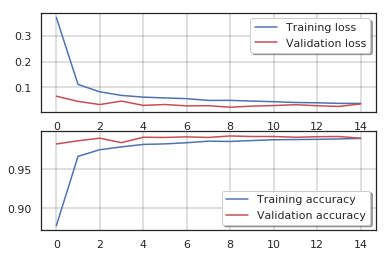

In [26]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation loss",axes =ax[0])
ax[0].grid(color='black', linestyle='-', linewidth=0.25)
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax[1].grid(color='black', linestyle='-', linewidth=0.25)
legend = ax[1].legend(loc='best', shadow=True)

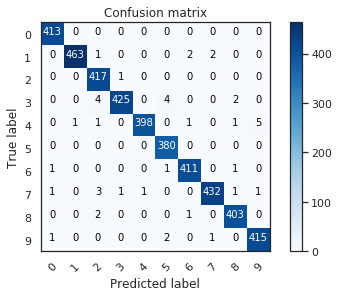

In [28]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
ypred_onehot = model.predict(xval)
# Convert predictions classes from one hot vectors to labels: [0 0 1 0 0 ...] --> 2
ypred = np.argmax(ypred_onehot,axis=1)
# Convert validation observations from one hot vectors to labels
ytrue = np.argmax(yval,axis=1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(ytrue, ypred)
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes=range(nclasses))

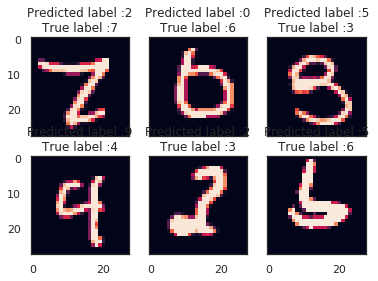

In [29]:
errors = (ypred - ytrue != 0) # array of bools with true when there is an error or false when the image is cor

ypred_er = ypred_onehot[errors]
ypred_classes_er = ypred[errors]
ytrue_er = ytrue[errors]
xval_er = xval[errors]

def display_errors(errors_index, img_errors, pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows, ncols, sharex=True, sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1
# Probabilities of the wrong predicted numbers
ypred_er_prob = np.max(ypred_er,axis=1)

# Predicted probabilities of the true values in the error set
true_prob_er = np.diagonal(np.take(ypred_er, ytrue_er, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_er = ypred_er_prob - true_prob_er

# Sorted list of the delta prob errors
sorted_delta_er = np.argsort(delta_pred_true_er)

# Top 6 errors. You can change the range to see other images
most_important_er = sorted_delta_er[-6:]

# Show the top 6 errors
display_errors(most_important_er, xval_er, ypred_classes_er, ytrue_er)

In [ ]:
predictions = model.predict_classes(test, verbose=1)

submissions = pd.DataFrame({"ImageId": list(range(1,len(predictions)+1)),
                            "Label": predictions})

submissions.to_csv("mnist2908.csv", index=False, header=True)